# Store Item Demand Forecasting

## Problem Statement

Given 5 years of store-item sales data, and asked to predict 3 months of sales for 50 different items at 10 different stores.

## Data Description

The objective of this competition is to predict 3 months of item-level sales data at different store locations.

Attribute Information:

|Variables	    |Description
|:-----------   |:----------------------------------------------------------------------------------------------- |
|date          |Date of the sale data(There are no holiday effects or store closures)
|store         |Store ID
|item          |Item ID
|sales         |Number of items sold at a particular store on a particular date

## Importing Packages

In [1]:
import numpy as np                     
import pandas as pd

pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook

from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

<ipython-input-1-4510a1a95368>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)           # To display all the data in each column


In [2]:
# Decomposition

from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

#Metrics
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf

## Modelling

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

##  Data Loading and Visualization

In [3]:
sales_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Store_Item_demand_forecast.csv')
sales_data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
sales_data.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [5]:
sales_data.shape

(913000, 4)

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [7]:
sales_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
store,913000.0,5.500000,2.872283,1.0,3.0,5.5,8.0,10.0
item,913000.0,25.500000,14.430878,1.0,13.0,25.5,38.0,50.0
sales,913000.0,52.250287,28.801144,0.0,30.0,47.0,70.0,231.0


In [8]:
sales_data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [9]:
sales_data['date'] = pd.to_datetime(sales_data.date)

In [10]:
sales_data.dtypes

date     datetime64[ns]
store    int64         
item     int64         
sales    int64         
dtype: object

### Feature Engineering

In [11]:
salesdata_eda =sales_data.copy()
salesdata_eda['year'] = sales_data['date'].dt.year
salesdata_eda['month'] = sales_data['date'].dt.month
salesdata_eda['day'] = sales_data['date'].dt.dayofyear
salesdata_eda['weekday'] = sales_data['date'].dt.weekday
salesdata_eda.head()

,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5


##  Exploratory Data Analysis

### Data Collection

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store, dtype: int64


<AxesSubplot:xlabel='store', ylabel='count'>

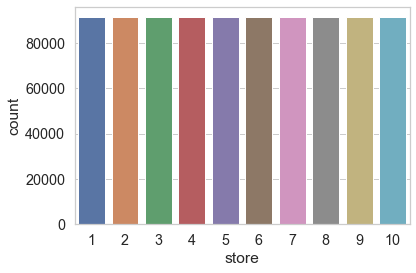

In [12]:
print(sales_data.store.value_counts())
sns.countplot(sales_data.store)

- Across all stores data collected equally

### Sales

#### Store wise Sales

In [13]:
sales_data.iloc[sales_data.sales.idxmax()]

date     2017-07-02 00:00:00
store    2                  
item     15                 
sales    231                
Name: 259109, dtype: object

In [14]:
sales_data.iloc[sales_data.sales.idxmin()]

date     2014-01-15 00:00:00
store    6                  
item     4                  
sales    0                  
Name: 64289, dtype: object

<AxesSubplot:xlabel='store', ylabel='sales'>

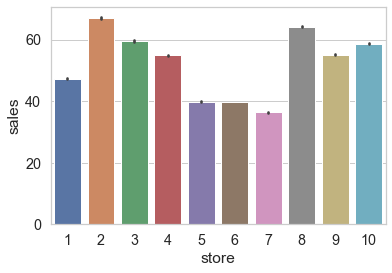

In [15]:
sns.barplot(x = "store", y = "sales", data = sales_data)

- Store #2 recorded maximun sale and store #7 with Lowest ovelall Sales

#### Item wise Sales

<AxesSubplot:xlabel='item', ylabel='sales'>

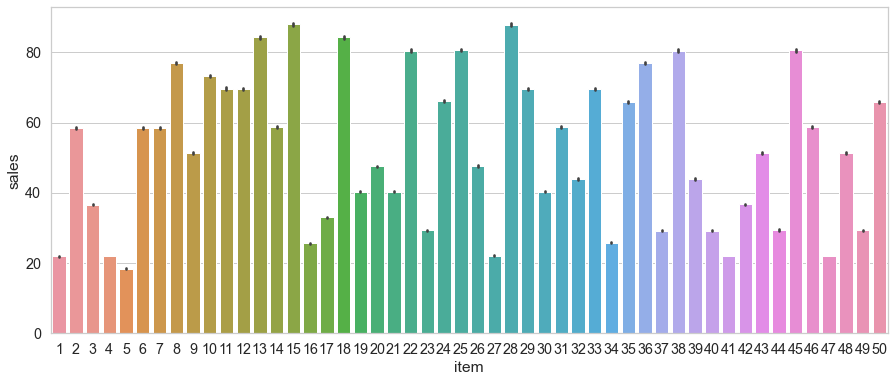

In [16]:
plt.figure(figsize = (15, 6))
sns.barplot(x = "item", y = "sales", data = sales_data)

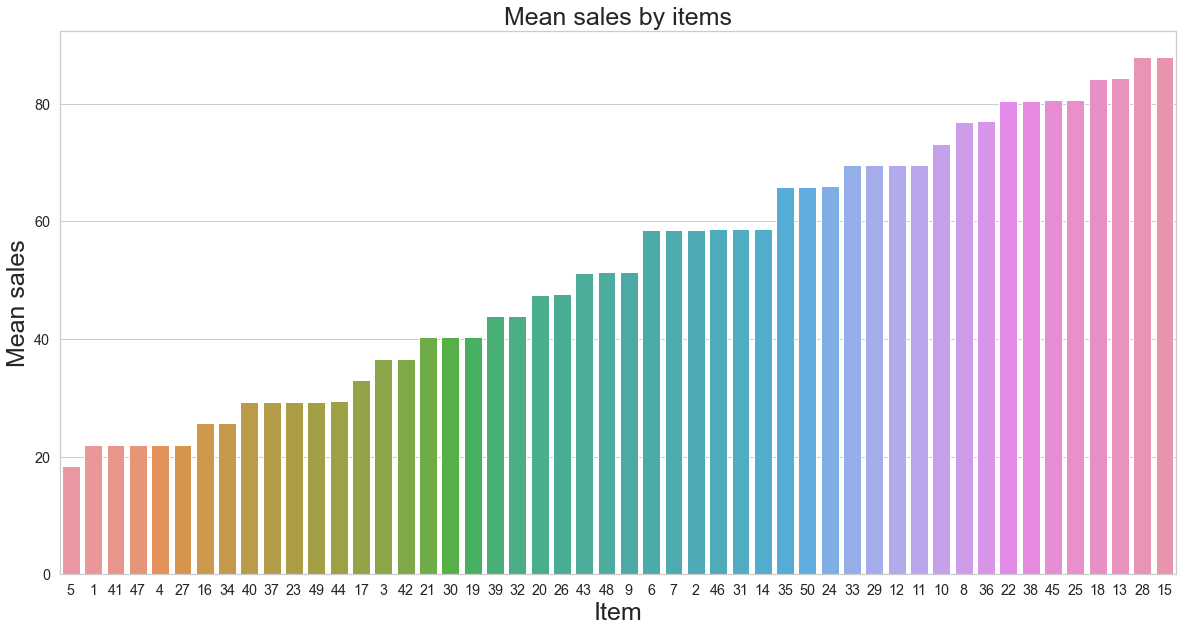

In [17]:
plt.close('all')
item_df = sales_data.groupby(['item']).mean()
item_df.sort_values('sales',ascending=True,inplace=True)
x = item_df.index
y = item_df.sales
plt.figure(figsize=(20,10))
sns.barplot(x=x, y=y, order=x)
plt.xlabel("Item",fontsize = 25)
plt.ylabel("Mean sales",fontsize=25)
plt.title("Mean sales by items",fontsize=25)
plt.show()

- Item 15 had recorded maximum Sale Value
- Item 5 had recorded minimum Sales Value

In [18]:
sales_data.iloc[sales_data['sales'].sort_values(ascending=False)[:10].index, :]

,date,store,item,sales
259109,2017-07-02,2,15,231
386579,2016-07-17,2,22,214
222596,2017-07-09,2,13,210
258759,2016-07-17,2,15,209
313889,2017-07-02,2,18,208
258752,2016-07-10,2,15,207
496495,2017-07-08,2,28,206
806909,2017-07-02,2,45,205
806930,2017-07-23,2,45,205
259116,2017-07-09,2,15,205


#### Overall daily sales

<AxesSubplot:xlabel='Year', ylabel='Sales'>

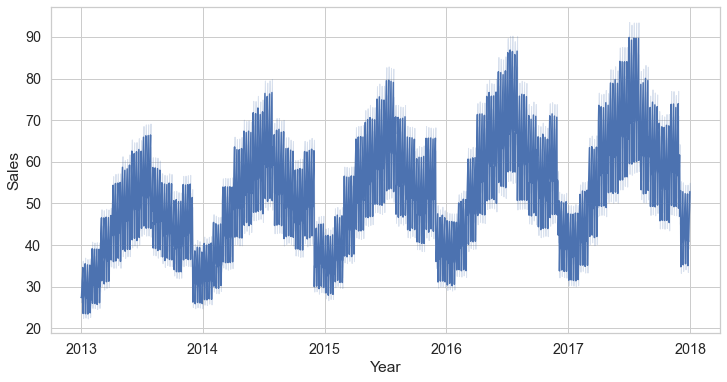

In [21]:
plt.figure(figsize = (12, 6))
plt.xlabel('Year')
plt.ylabel('Sales')
x= np.array(sales_data.date)
y=np.array(sales_data.sales)

sns.lineplot(x, y,legend = 'full' , data=sales_data)

- There is a year wise seasonality and basic structure in Additive nature in the dataset

#### Daily sales by store

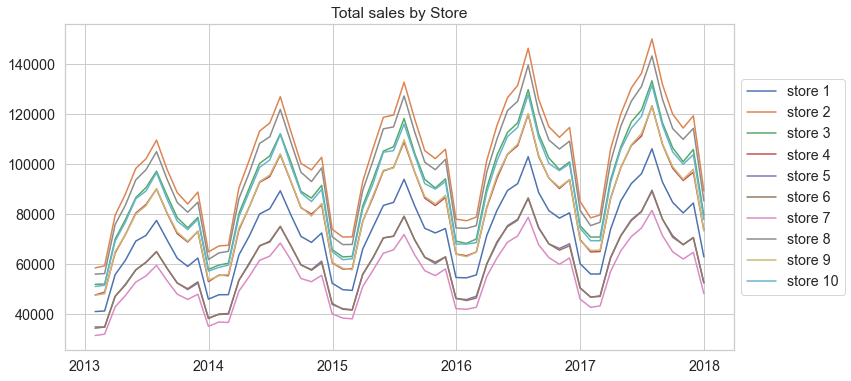

In [22]:
plt.figure(figsize = (12, 6))
for i in range(1,11):
    month_df = sales_data[sales_data.store==i].resample('M',on='date').sum()
    x= np.array(month_df.index)
    y=np.array(month_df.sales)
    plt.plot(x,y,label = 'store %s' % i)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Total sales by Store")
plt.show()

#### Daily sales by item

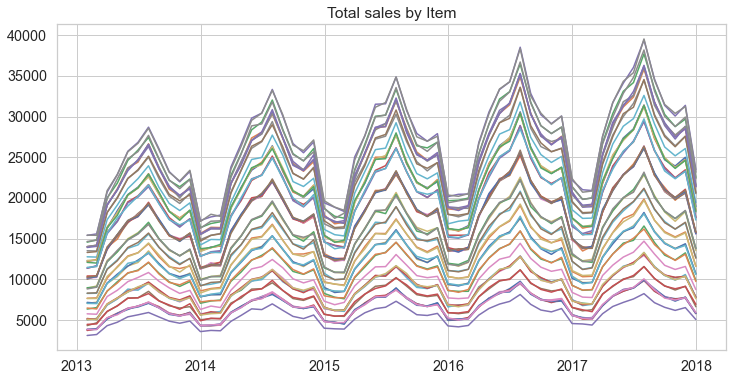

In [23]:
plt.figure(figsize = (12, 6))
for i in range(1,51):
    df = sales_data[sales_data.item==i].resample('M',on='date').sum()
    x= np.array(df.index)
    y=np.array(df.sales)
    plt.plot(x,y,label = 'item %s' % i)
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Total sales by Item")
plt.show()

####  Weekday Sales

<AxesSubplot:xlabel='weekday', ylabel='sales'>

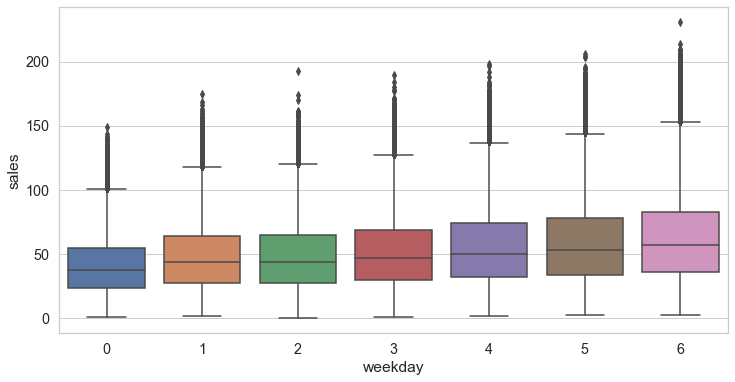

In [24]:
plt.figure(figsize = (12, 6))
sns.boxplot(x="weekday", y="sales", data=salesdata_eda)

- Monday=0, Sunday=6.
- Here we can find the weekends(5,6) has a higher sales, weekdays(0-4) are lower.

####  Changes by year

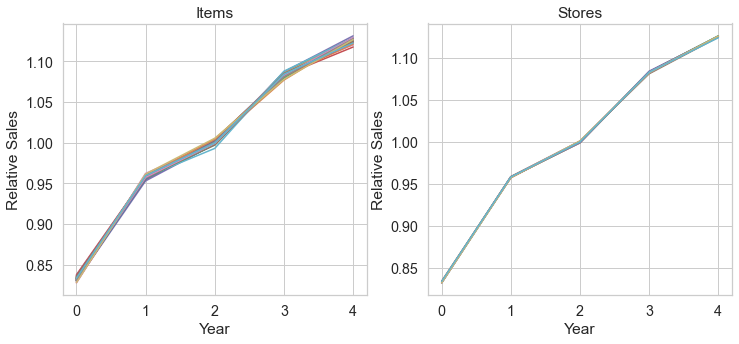

In [25]:
agg_year_item = pd.pivot_table(salesdata_eda, index='year', columns='item',
                               values='sales', aggfunc=np.mean).values
agg_year_store = pd.pivot_table(salesdata_eda, index='year', columns='store',
                                values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_year_item / agg_year_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Year")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_year_store / agg_year_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Year")
plt.ylabel("Relative Sales")
plt.show()

- All items and stores seem to share a common pattern in sales over the years

####  Changes by month

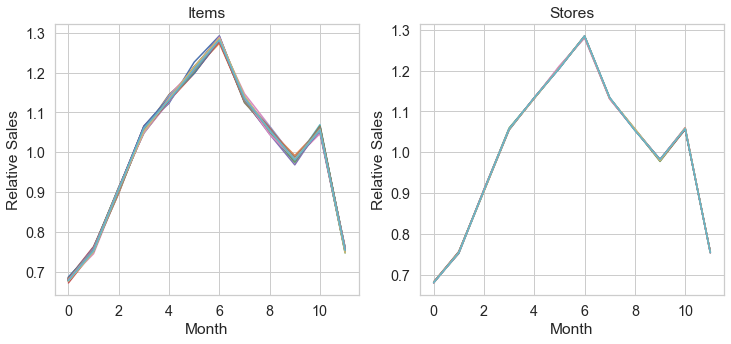

In [26]:
agg_year_item = pd.pivot_table(salesdata_eda, index='month', columns='item',values='sales', aggfunc=np.mean).values
agg_year_store = pd.pivot_table(salesdata_eda, index='month', columns='store',values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_year_item / agg_year_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Month")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_year_store / agg_year_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Month")
plt.ylabel("Relative Sales")
plt.show()

- All items and stores seem to share a common pattern in sales over the months as well.

####  Changes by day of the week

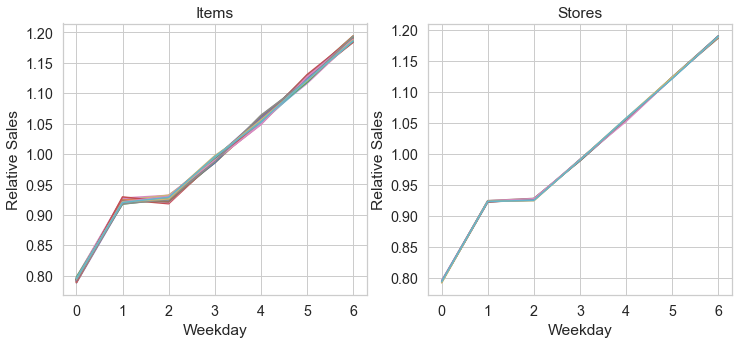

In [27]:
agg_year_item = pd.pivot_table(salesdata_eda, index='weekday', columns='item',values='sales', aggfunc=np.mean).values
agg_year_store = pd.pivot_table(salesdata_eda, index='weekday', columns='store',values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_year_item / agg_year_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Weekday")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_year_store / agg_year_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Weekday")
plt.ylabel("Relative Sales")
plt.show()

- All items and stores also seem to share a common pattern in sales over the days of the week as well.

- We can effectively treat the "month", "year", "day of the week", "item" and "store" as completely independent modifiers to sales prediction.

## Check the data the seasonality of the data

<AxesSubplot:xlabel='Month', ylabel='Sales'>

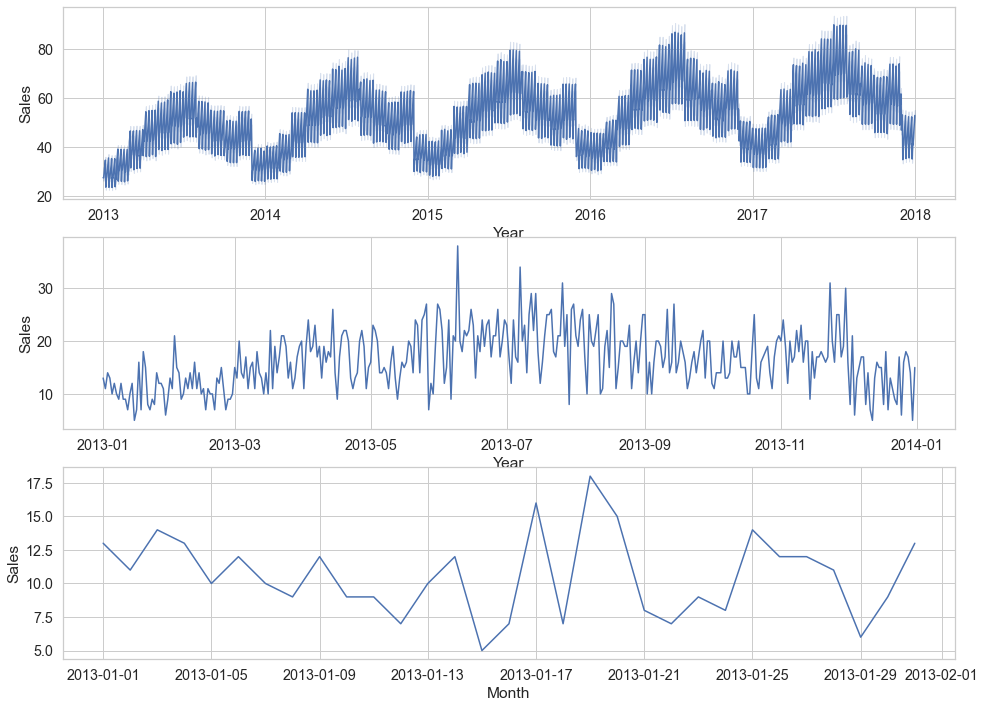

In [28]:
plt.figure(figsize = (16, 12))

plt.subplot(3, 1, 1)
plt.xlabel('Year')
plt.ylabel('Sales')
x= np.array(sales_data.date[:])
y=np.array(sales_data.sales[:])
sns.lineplot(x, y,legend = 'full' , data=sales_data)

plt.subplot(3, 1, 2)
plt.xlabel('Year')
plt.ylabel('Sales')
x= np.array(sales_data.date[:365])
y=np.array(sales_data.sales[:365])
sns.lineplot(x, y,legend = 'full' , data=sales_data)

plt.subplot(3, 1, 3)
plt.xlabel('Month')
plt.ylabel('Sales')
x= np.array(sales_data.date[:31])
y=np.array(sales_data.sales[:31])
sns.lineplot(x, y,legend = 'full' , data=sales_data)

- There is a year wise aseasonality in the dataset

## Decomposition

To start with, we want to decompose the data to seperate the seasonality, trend and residual. Since we have 5 years of sales data. We would expect there's a yearly,monthly,weekly & daily pattern.

In [19]:
sales_forcast = salesdata_eda[(salesdata_eda['store']==1) & (salesdata_eda['item']==1)]
#sales_forcast = train_df[train_df['item']==1]

In [20]:
sales_forcast = sales_forcast.set_index(['date'])
#sales_forcast = sales_forcast.drop(['store','item'],1)
sales_forcast['sales'] = sales_forcast['sales'].astype(float)
sales_forcast.head()

,store,item,sales,year,month,day,weekday
date,,,,,,,
2013-01-01,1,1,13.0,2013,1,1,1
2013-01-02,1,1,11.0,2013,1,2,2
2013-01-03,1,1,14.0,2013,1,3,3
2013-01-04,1,1,13.0,2013,1,4,4
2013-01-05,1,1,10.0,2013,1,5,5


In [21]:
sales_forcast.shape

(1826, 7)

In [22]:
sales_forcast.tail()

,store,item,sales,year,month,day,weekday
date,,,,,,,
2017-12-27,1,1,14.0,2017,12,361,2
2017-12-28,1,1,19.0,2017,12,362,3
2017-12-29,1,1,15.0,2017,12,363,4
2017-12-30,1,1,27.0,2017,12,364,5
2017-12-31,1,1,23.0,2017,12,365,6


### Stationarity Check 

In [23]:
final_df = sales_forcast.sales
final_df.head()

date
2013-01-01    13.0
2013-01-02    11.0
2013-01-03    14.0
2013-01-04    13.0
2013-01-05    10.0
Name: sales, dtype: float64

In [24]:
final_df.shape

(1826,)

In [25]:
def test_stationarity(time_series):
    rolling_means(time_series)
    adf_test(time_series)

####  Rolling Statistics Methodology 

In [26]:
# Determine rolling statistics
def rolling_means(time_series):
    rolmean  =  time_series.rolling(window = 365).mean() 
    rolstd  =  time_series.rolling(window = 365).std()

    #Plot rolling statistics

    rcParams['figure.figsize']  =  14, 7 

    orig  =  plt.plot(time_series, color = 'blue', label = 'Original')
    mean  =  plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std  =  plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)

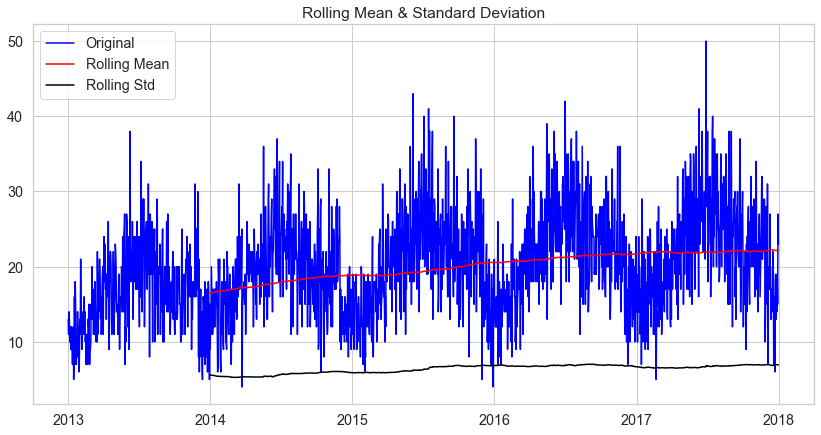

In [27]:
rolling_means(final_df)

#### ADF(Augmented Dickey-Fuller) Test 

In [28]:
def adf_test(time_series):
    dftest  =  adfuller(time_series, autolag = 'AIC')
    dfoutput  =  pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]  =  value
    
    print('Results of Dickey Fuller Test:')    
    print(dfoutput)

In [29]:
adf_test(final_df)

Results of Dickey Fuller Test:
Test Statistic                -3.157671   
p-value                        0.022569   
#Lags Used                     23.000000  
Number of Observations Used    1802.000000
Critical Value (1%)           -3.433984   
Critical Value (5%)           -2.863145   
Critical Value (10%)          -2.567625   
dtype: float64


- critical values (5%) is higher than the Test Statistics.Hence, we can say that our Time Series at the moment is 95% confidant that it is stationary

The Dickey-Fuller test p-value is lower than I would have expected, but the time series is not considered stationary using a 1% Critical Value and we can see visually that there is an upwards trend.

###  Data Transformation to achieve Stationarity

####  Moving Average Transformation

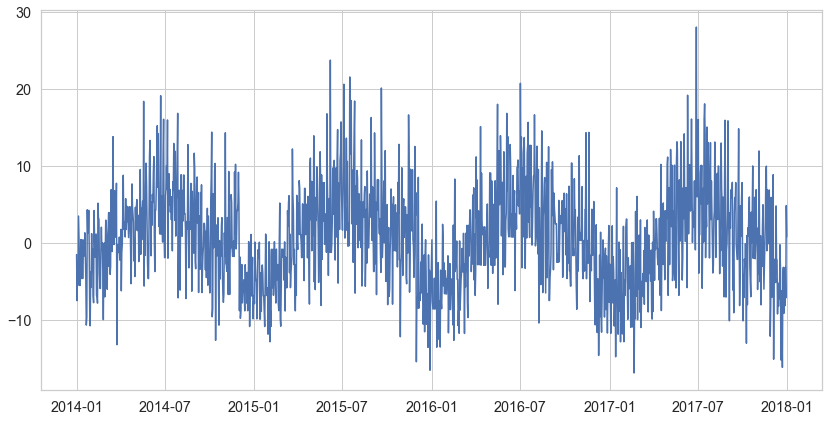

In [30]:
movingAverage  =  final_df.rolling(window = 365).mean()
MovingAverage_df =  final_df - movingAverage
plt.plot(MovingAverage_df)

#Remove NAN values
MovingAverage_df.dropna(inplace = True)


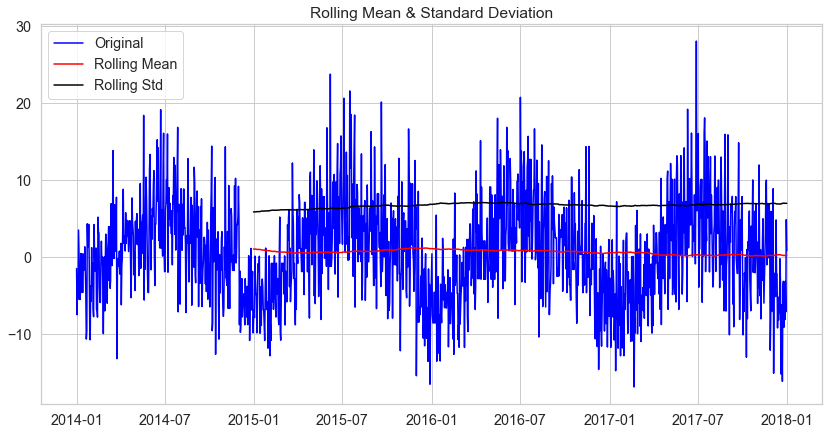

Results of Dickey Fuller Test:
Test Statistic                -2.523636   
p-value                        0.109829   
#Lags Used                     23.000000  
Number of Observations Used    1438.000000
Critical Value (1%)           -3.434906   
Critical Value (5%)           -2.863552   
Critical Value (10%)          -2.567841   
dtype: float64


In [31]:
test_stationarity(MovingAverage_df)

We observe that the Time Series is not stationary, Test Statistic value is greater than the Critical values.

####  Exponential Decay Transformation

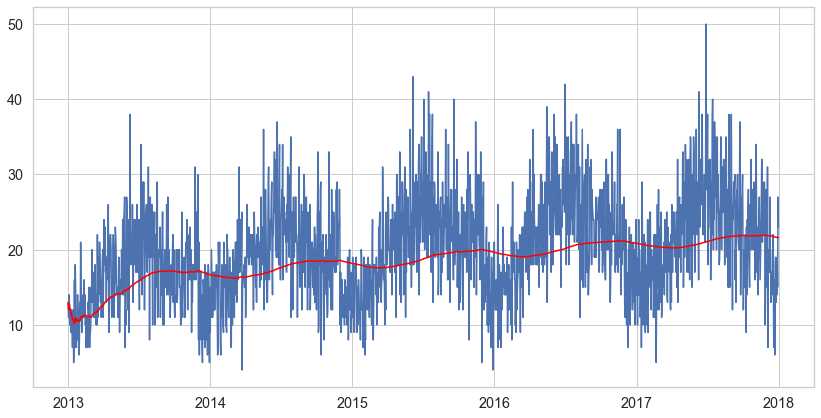

In [33]:
EDT_df  =  final_df.ewm(halflife = 365, min_periods = 0, adjust = True).mean()
plt.plot(final_df)
plt.plot(EDT_df, color = 'red')

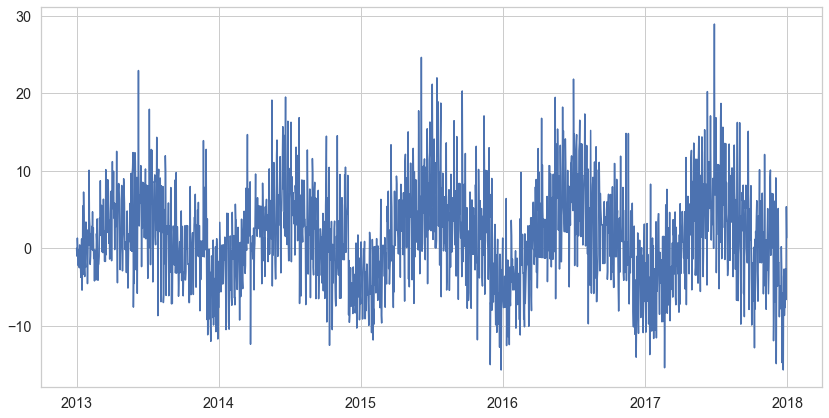

In [36]:
ExponentialMovingAverage  =  final_df - EDT_df
plt.plot(ExponentialMovingAverage)

#Remove NAN values
ExponentialMovingAverage.dropna(inplace = True)


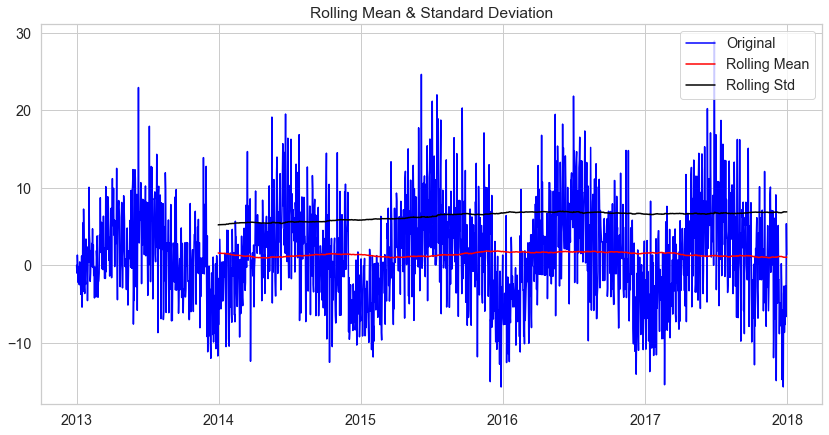

Results of Dickey Fuller Test:
Test Statistic                -3.140142   
p-value                        0.023722   
#Lags Used                     25.000000  
Number of Observations Used    1800.000000
Critical Value (1%)           -3.433988   
Critical Value (5%)           -2.863147   
Critical Value (10%)          -2.567626   
dtype: float64


In [37]:
test_stationarity(ExponentialMovingAverage)

- We observe that the Time Series is stationary & also the series for moving avg & std. dev. is almost parallel to x-axis thus they also have no trend.

- We will go ahead with the **ExponentialMovingAverage** dataset.

####  Time Shift Transformation 

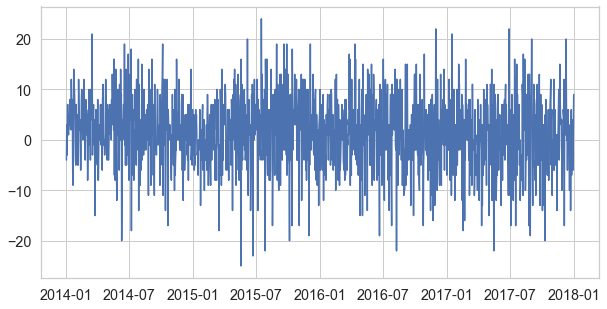

In [39]:
TST_df  =  final_df - final_df.shift(365)
plt.plot(TST_df)

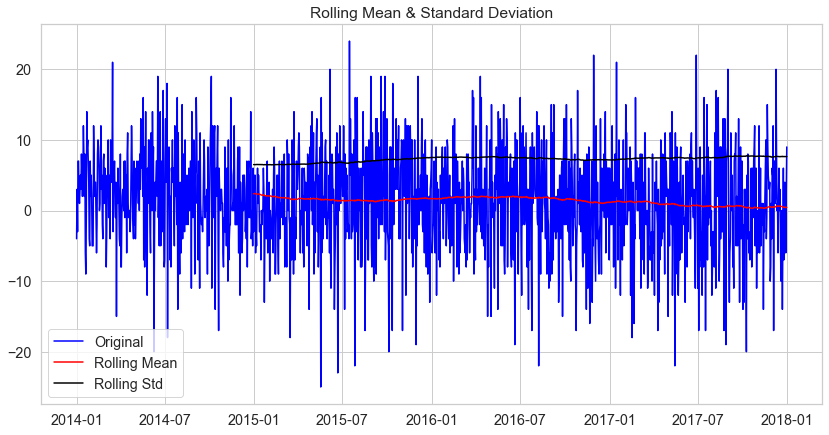

Results of Dickey Fuller Test:
Test Statistic                -6.748945e+00
p-value                        2.985054e-09
#Lags Used                     2.000000e+01
Number of Observations Used    1.440000e+03
Critical Value (1%)           -3.434899e+00
Critical Value (5%)           -2.863549e+00
Critical Value (10%)          -2.567840e+00
dtype: float64


In [40]:
TST_df.dropna(inplace = True)

test_stationarity(TST_df)

## Plotting ACF & PACF 

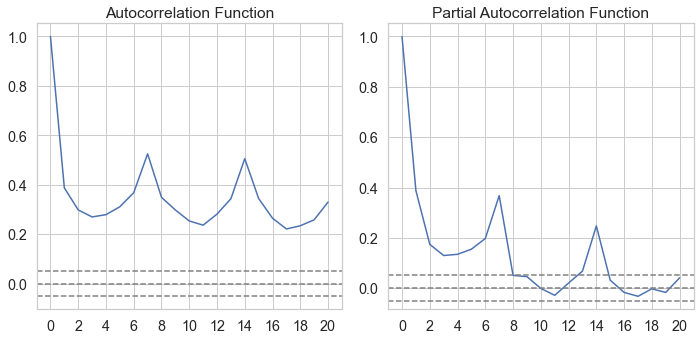

In [77]:
#ACF & PACF plots

from statsmodels.tsa.stattools import acf, pacf

lag_acf  =  acf(TST_df, nlags = 20)
lag_pacf  =  pacf(TST_df, nlags = 20, method = 'ols')
rcParams['figure.figsize']  =  10, 5
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(TST_df)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(TST_df)), linestyle = '--', color = 'gray')
plt.xticks(np.arange(0,22,2))
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(TST_df)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(TST_df)), linestyle = '--', color = 'gray')
plt.xticks(np.arange(0,22,2))
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()         

From the __ACF graph__, 
- Curve touches y = 0.0 line at x = 2. Thus, __Q  =  2__


From the __PACF graph__,
- Curve touches y = 0.0 line at x = 2. Thus, __P  =  2__


##  Building Models 

In [42]:
TST_df.shape

(1461,)

In [43]:
# Data Preparation
train, test =TST_df[0:len(TST_df)-365], TST_df[len(TST_df)-365:]
train.head()

date
2014-01-01   -4.0
2014-01-02    3.0
2014-01-03   -3.0
2014-01-04    7.0
2014-01-05    7.0
Name: sales, dtype: float64

In [44]:
test.tail()

date
2017-12-27    4.0
2017-12-28    3.0
2017-12-29   -6.0
2017-12-30    3.0
2017-12-31    9.0
Name: sales, dtype: float64

### AR Model 

In [45]:
model1 = AR(train)
model1_fit = model1.fit()
print('Lag: %s' % model1_fit.k_ar)
print('Coefficients: %s' % model1_fit.params)

Lag: 22
Coefficients: const        1.510592
L1.sales    -0.045007
L2.sales    -0.069208
L3.sales     0.007634
L4.sales    -0.026366
L5.sales    -0.017628
L6.sales    -0.025369
L7.sales     0.198941
L8.sales    -0.068896
L9.sales    -0.021185
L10.sales   -0.003879
L11.sales   -0.004768
L12.sales    0.002128
L13.sales   -0.016634
L14.sales    0.134543
L15.sales   -0.015851
L16.sales    0.003532
L17.sales   -0.055006
L18.sales   -0.022591
L19.sales    0.034885
L20.sales   -0.017599
L21.sales    0.122207
L22.sales    0.020156
dtype: float64


C:\Users\Uthayanan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [46]:
# make predictions
predictions1 = model1_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
#predictions1.head()
for i in range(len(predictions1)):
    print('predicted=%f, expected=%f' % (predictions1[i], test.iloc[i]))

predicted=3.369689, expected=6.000000
predicted=0.059817, expected=3.000000
predicted=4.134727, expected=-2.000000
predicted=1.921035, expected=4.000000
predicted=1.159890, expected=-2.000000
predicted=4.196959, expected=12.000000
predicted=-2.065605, expected=2.000000
predicted=3.389681, expected=4.000000
predicted=-0.179298, expected=-8.000000
predicted=3.846451, expected=4.000000
predicted=1.967985, expected=1.000000
predicted=1.794115, expected=8.000000
predicted=4.742460, expected=-11.000000
predicted=-1.784422, expected=3.000000
predicted=3.009673, expected=21.000000
predicted=0.560466, expected=2.000000
predicted=3.389877, expected=7.000000
predicted=2.256180, expected=-7.000000
predicted=1.585553, expected=3.000000
predicted=3.511280, expected=10.000000
predicted=-1.049194, expected=-2.000000
predicted=2.619809, expected=-2.000000
predicted=0.906991, expected=-12.000000
predicted=2.694372, expected=3.000000
predicted=1.960084, expected=-4.000000
predicted=1.283742, expected=-1.

- Model evaluation using Mean_squared_error

Test RMSE: 7.710


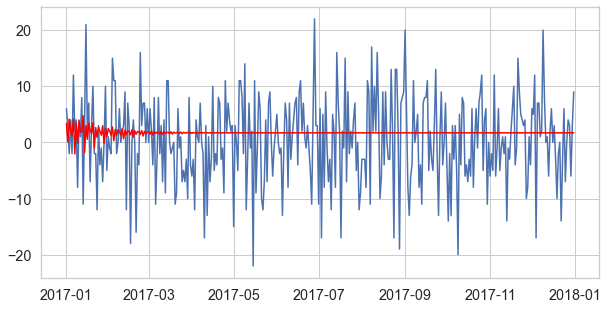

In [47]:
RMSE1 = np.sqrt(mean_squared_error(test, predictions1))
print('Test RMSE: %.3f' % RMSE1)
# plot results

pyplot.plot(test)
pyplot.plot(predictions1, color='red')
pyplot.show()

Plotting AR model


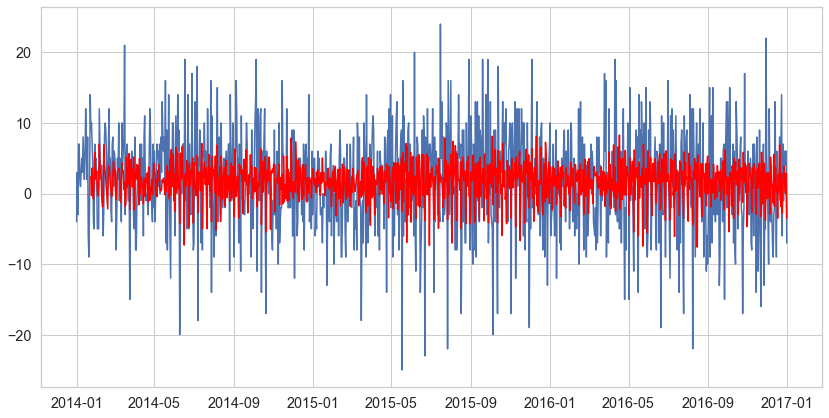

In [48]:
rcParams['figure.figsize']  =  14, 7 
plt.plot(train)
plt.plot(model1_fit.fittedvalues, color = 'red')
print('Plotting AR model')

###  ARMA Model

In [49]:
model2 = ARMA(train,order=(1,1))
model2_fit = model2.fit()
print('Lag: %s' % model2_fit.k_ar)
print('Coefficients: %s' % model2_fit.params)

C:\Users\Uthayanan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Lag: 1
Coefficients: const          1.738691
ar.L1.sales    0.451893
ma.L1.sales   -0.544616
dtype: float64


In [50]:
# make predictions
predictions2 = model2_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions2.head()
for i in range(len(predictions2)):
    print('predicted=%f, expected=%f' % (predictions2[i], test.iloc[i]))

predicted=2.147160, expected=6.000000
predicted=1.923275, expected=3.000000
predicted=1.822104, expected=-2.000000
predicted=1.776385, expected=4.000000
predicted=1.755725, expected=-2.000000
predicted=1.746389, expected=12.000000
predicted=1.742170, expected=2.000000
predicted=1.740263, expected=4.000000
predicted=1.739402, expected=-8.000000
predicted=1.739012, expected=4.000000
predicted=1.738836, expected=1.000000
predicted=1.738757, expected=8.000000
predicted=1.738721, expected=-11.000000
predicted=1.738705, expected=3.000000
predicted=1.738697, expected=21.000000
predicted=1.738694, expected=2.000000
predicted=1.738693, expected=7.000000
predicted=1.738692, expected=-7.000000
predicted=1.738692, expected=3.000000
predicted=1.738692, expected=10.000000
predicted=1.738691, expected=-2.000000
predicted=1.738691, expected=-2.000000
predicted=1.738691, expected=-12.000000
predicted=1.738691, expected=3.000000
predicted=1.738691, expected=-4.000000
predicted=1.738691, expected=-1.0000

Test RMSE: 7.735


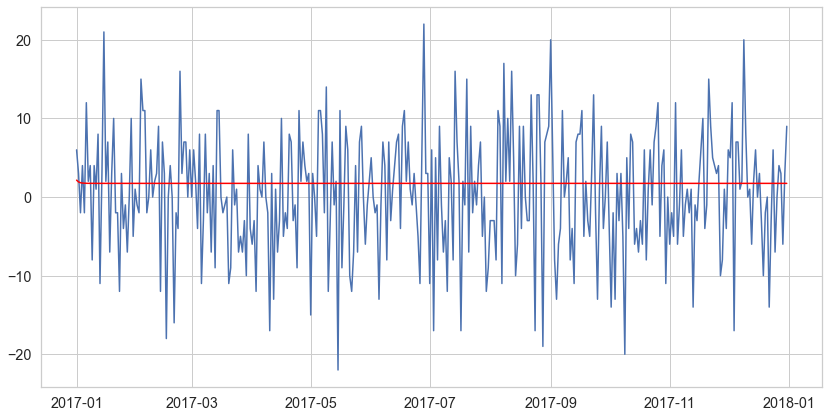

In [51]:
RMSE2 = np.sqrt(mean_squared_error(test, predictions2))
print('Test RMSE: %.3f' % RMSE2)
# plot results

pyplot.plot(test)
pyplot.plot(predictions2, color='red')
pyplot.show()

Plotting ARMA model


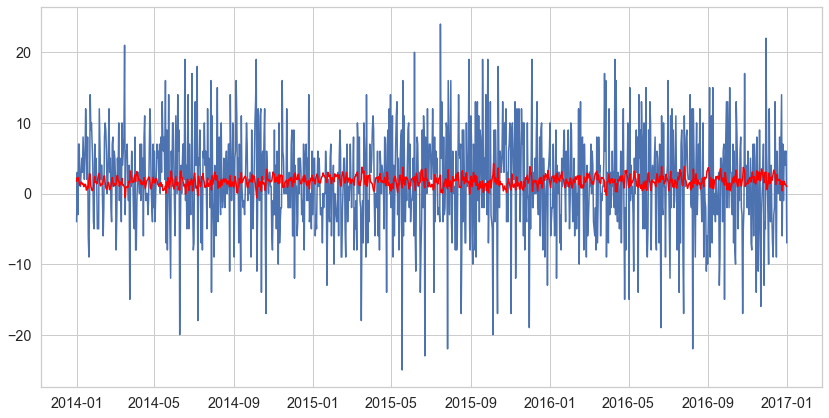

In [52]:
rcParams['figure.figsize']  =  14, 7 
plt.plot(train)
plt.plot(model2_fit.fittedvalues, color = 'red')
print('Plotting ARMA model')

###  ARIMA Model 

In [53]:
model3 = ARIMA(MovingAverage_df,order=(1,1,1))
print('Lag: %s' % model2_fit.k_ar)
print('Coefficients: %s' % model2_fit.params)

Lag: 1
Coefficients: const          1.738691
ar.L1.sales    0.451893
ma.L1.sales   -0.544616
dtype: float64


C:\Users\Uthayanan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Uthayanan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [54]:
results_ARIMA = model3.fit()

In [56]:
RMSE3 = np.sqrt(mean_squared_error(TST_df, results_ARIMA.fittedvalues))
print('TRAIN RMSE: %.3f' % RMSE3)

TRAIN RMSE: 8.162


In [57]:
results_ARIMA.fittedvalues.head()

date
2014-01-01   -0.001338
2014-01-02    2.769186
2014-01-03   -1.156708
2014-01-04    1.168998
2014-01-05   -5.597153
dtype: float64

<AxesSubplot:xlabel='date'>

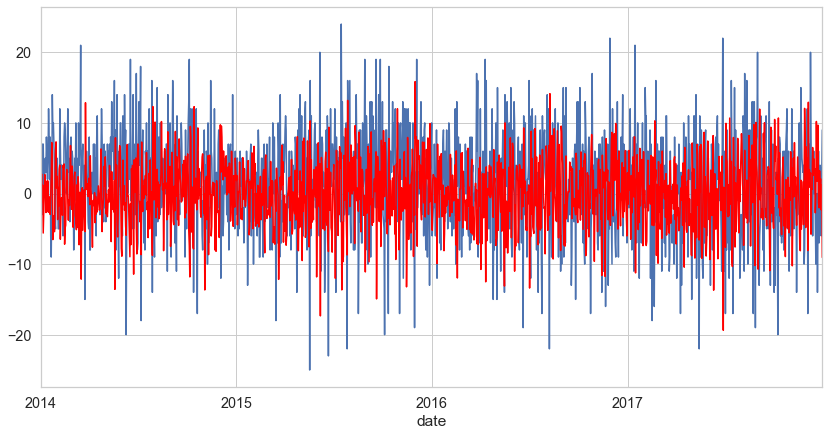

In [58]:
rcParams['figure.figsize']  =  14, 7 
TST_df.plot()
results_ARIMA.fittedvalues.plot(color='red')

##  Prediction & Reverse transformations of fittedvalues

In [59]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

date
2014-01-01   -0.001338
2014-01-02    2.769186
2014-01-03   -1.156708
2014-01-04    1.168998
2014-01-05   -5.597153
dtype: float64

In [60]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

date
2014-01-01   -0.001338
2014-01-02    2.767848
2014-01-03    1.611140
2014-01-04    2.780138
2014-01-05   -2.817015
dtype: float64

In [79]:
predictions_ARIMA = pd.Series(final_df.iloc[0],index=TST_df.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA.head()

date
2014-01-01    12.998662
2014-01-02    15.769186
2014-01-03    11.843292
2014-01-04    14.168998
2014-01-05    7.402847 
dtype: float64

In [74]:
final_df.head()

date
2013-01-01    13.0
2013-01-02    11.0
2013-01-03    14.0
2013-01-04    13.0
2013-01-05    10.0
Name: sales, dtype: float64

In [75]:
predictions_ARIMA.shape

(1461,)

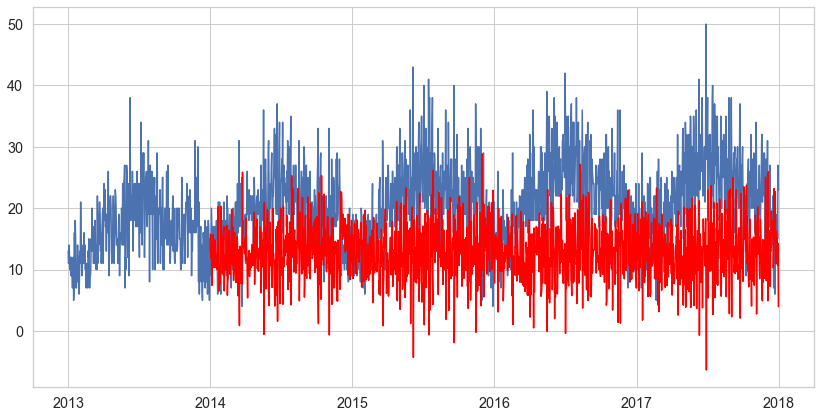

In [76]:
pyplot.plot(final_df)
pyplot.plot(predictions_ARIMA, color='red')
pyplot.show()

In [118]:
final_df_logScale.columns = ['log scale']
reverted_back_prediction.columns = ['ARIMA Predicted Sales']

In [119]:
df = pd.concat([final_df,final_df_logScale, reverted_back_prediction], axis=1, sort=False)
df.tail()

,sales,sales,ARIMA Predicted Sales
date,,,
2017-12-27,14.0,2.639057,13.847588
2017-12-28,19.0,2.944439,14.851028
2017-12-29,15.0,2.708050,15.678119
2017-12-30,27.0,3.295837,17.697222
2017-12-31,23.0,3.135494,18.648751


##  Forecasting the 3 months of sales

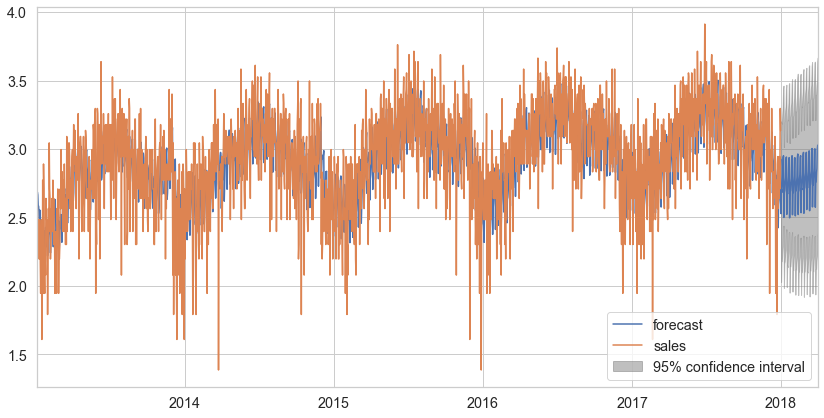

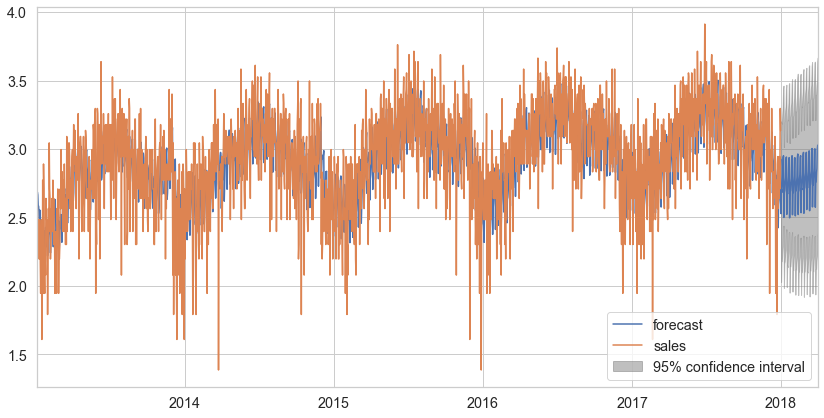

In [123]:
results_ARIMA.plot_predict(1,1916) 

## Prediction & Reverse transformations of next 3 months of sales

In [124]:
ninety_days_forecast = results_ARIMA.predict(start=len(final_df_logScale),end = len(final_df_logScale) + 90 ) 

In [128]:
predictions_ARIMA_diff1 = pd.Series(ninety_days_forecast, copy=True)
predictions_ARIMA_diff1.head()

2018-01-01    2.527784
2018-01-02    2.702831
2018-01-03    2.683454
2018-01-04    2.749842
2018-01-05    2.800703
Freq: D, dtype: float64

In [129]:
reverted_back_prediction1 = pd.DataFrame(np.exp(predictions_ARIMA_diff1))
reverted_back_prediction1.head()

,0
2018-01-01,12.525716
2018-01-02,14.921920
2018-01-03,14.635552
2018-01-04,15.640162
2018-01-05,16.456209


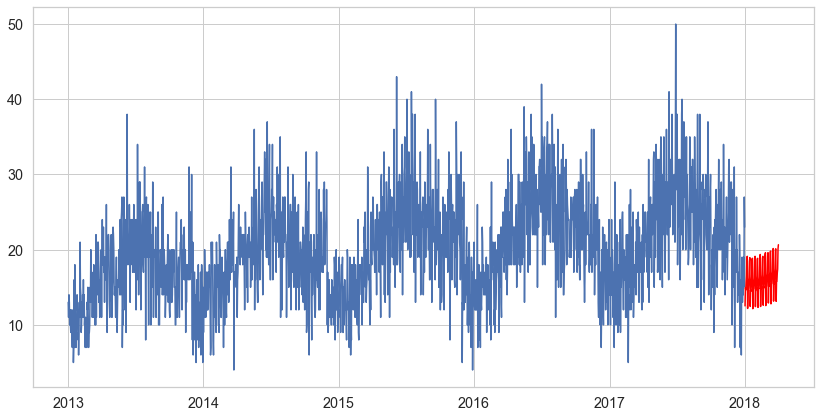

In [131]:
pyplot.plot(final_df)
pyplot.plot(reverted_back_prediction1, color='red')
pyplot.show()

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))